# Постобработка

In [1]:
import pandas as pd

dinis_df = pd.read_csv('/content/drive/MyDrive/nlp/Динислам.csv', sep=None)
my_df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep=None)
olya_df = pd.read_csv('/content/drive/MyDrive/nlp/Оля.csv', sep=None)

dinis_df.insert(10, 'Лишнее', False)
olya_df.insert(10, 'Лишнее', False)

<ipython-input-1-51a195d716cc>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  dinis_df = pd.read_csv('/content/drive/MyDrive/nlp/Динислам.csv', sep=None)
<ipython-input-1-51a195d716cc>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  my_df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep=None)
<ipython-input-1-51a195d716cc>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  olya_df = pd.read_csv('/content/drive/MyDrive/nlp/Оля.csv', sep=None)


In [2]:
dinis_df.drop(1, inplace=True)
olya_df.drop([0, 1], inplace=True)

In [3]:
merged_df = pd.concat([my_df, dinis_df, olya_df], axis = 0, ignore_index=True)

In [4]:
merged_df.shape

(2386, 15)

In [5]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep='/t')

merged_df.fillna(False, inplace=True)

drop_columns = ['annotation_id','annotator','created_at','lead_time','updated_at']
merged_df = merged_df.drop(columns=drop_columns)

def sentiment_proceed(index, df):
  import json

  row = df['sentiment'].values[index]
  try:
    sen_dict =  json.loads(row)
    choices = sen_dict['choices']
  except json.JSONDecodeError:
    choices = [row]
  return choices

for index, row in merged_df.iterrows():
  value_to_fill = sentiment_proceed(index, merged_df)
  for value in value_to_fill:
    merged_df.loc[index, value] = True

<ipython-input-5-c1a6e8d33a79>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df.fillna(False, inplace=True)
<ipython-input-5-c1a6e8d33a79>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.fillna(False, inplace=True)


In [6]:
merged_df.head()

,comment,id,rating,sentiment,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,спасибо,2945792,5,Понравилось выполнение заявки,False,False,False,False,False,True
1,спасибо!,3234340,5,Понравилось выполнение заявки,False,False,False,False,False,True
2,Отлично,3380332,5,Понравилось выполнение заявки,False,False,False,False,False,True
3,Благодарю за оперативное решение проблемы !,3381812,5,"{""choices"":[""Нравится скорость отработки заяво...",True,False,False,False,True,False
4,Прекрасный специалист! Побольше таких,3461991,5,Нравится качество работы сотрудников,False,False,False,True,False,False


In [7]:
merged_df = merged_df.drop(columns='sentiment')

In [8]:
int_categories = (merged_df.iloc[0::, 3::]).astype(int)
merged_df = pd.concat([merged_df.iloc[0::, 0:3], int_categories], axis=1)


In [9]:
merged_df.drop_duplicates(inplace=True)

In [10]:
merged_df.to_csv('/content/drive/MyDrive/nlp/самая общая постобработка.csv')

# Баланс классов

In [11]:
model_df = pd.read_csv('/content/drive/MyDrive/nlp/самая общая постобработка.csv')
model_df.head()

,Unnamed: 0,comment,id,rating,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,0,спасибо,2945792,5,0,0,0,0,0,1
1,1,спасибо!,3234340,5,0,0,0,0,0,1
2,2,Отлично,3380332,5,0,0,0,0,0,1
3,3,Благодарю за оперативное решение проблемы !,3381812,5,1,0,0,0,1,0
4,4,Прекрасный специалист! Побольше таких,3461991,5,0,0,0,1,0,0


In [12]:
model_df = model_df.drop(columns='Unnamed: 0')

In [13]:
marks_column = model_df.iloc[0::, 3::].columns

class_balance = pd.DataFrame({
    'marks' : [column for column in model_df.iloc[0::, 3::].columns],
    'count' : [((model_df[column] == 1).sum()) for column in model_df.iloc[0::, 3::].columns]
})

In [14]:
class_balance

,marks,count
0,Вопрос решен,952
1,Лишнее,269
2,Нравится качество выполнения заявки,222
3,Нравится качество работы сотрудников,368
4,Нравится скорость отработки заявок,805
5,Понравилось выполнение заявки,771


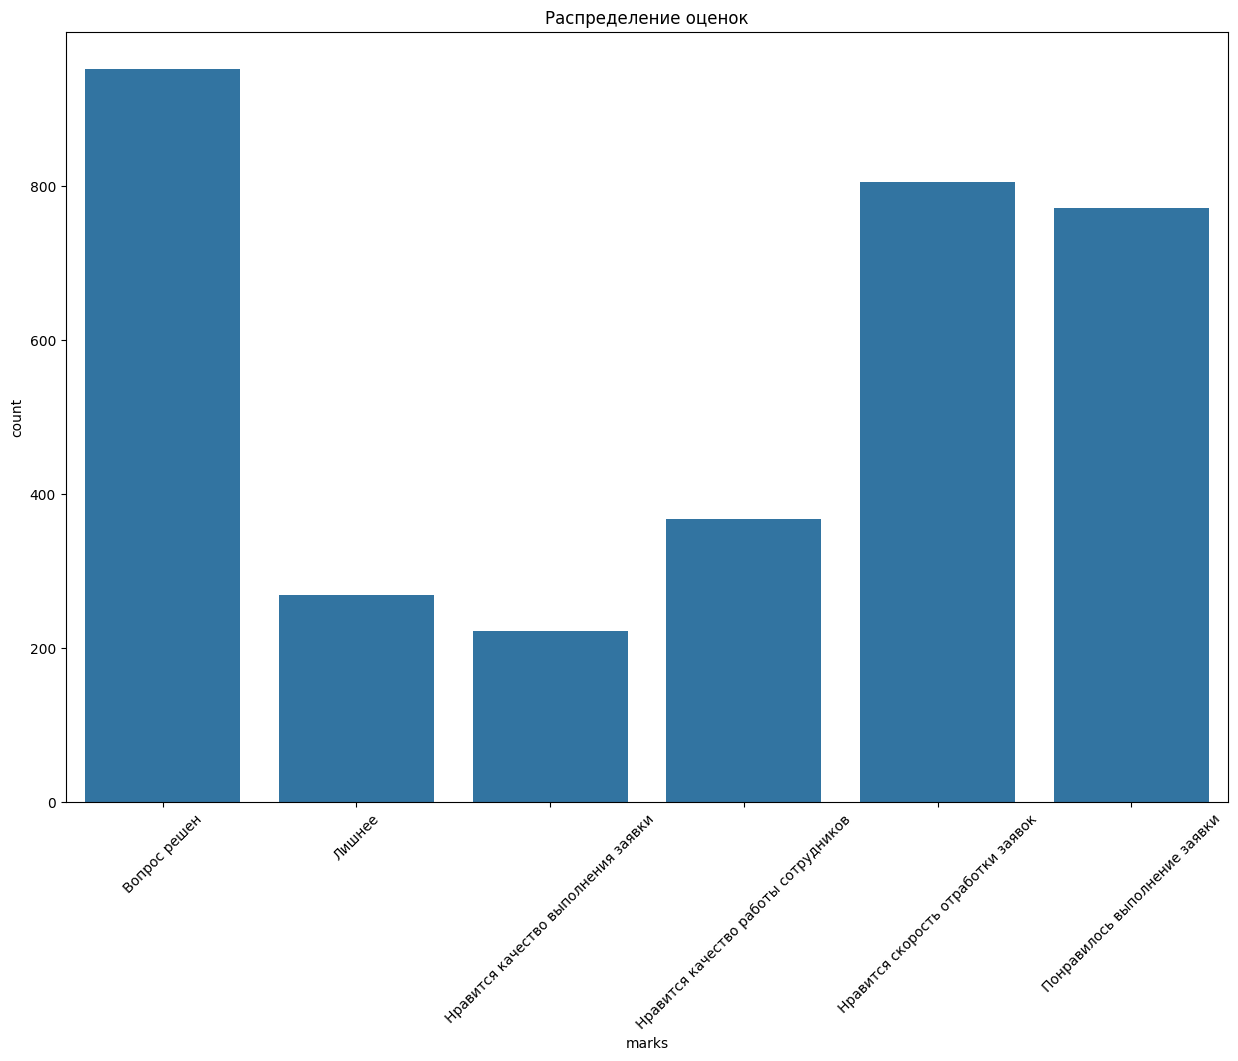

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.barplot(x='marks', y='count', data=class_balance, width=0.8)
plt.title('Распределение оценок')
plt.xticks(rotation=45)
plt.show()

# Статистика

**1. Облако слов**


Облако слов по всем комментариям.

по каждой категории отдельно

https://www.kaggle.com/code/anandhuh/word-cloud-in-python-for-beginners

In [16]:
!pip install wordcloud

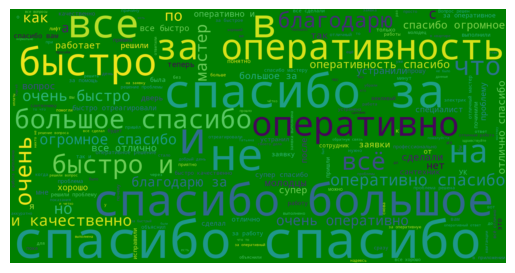

In [17]:
from wordcloud import WordCloud, ImageColorGenerator

text = ' '.join(comment for comment in model_df.comment)
simple_word_cloud = WordCloud(background_color='green', width=2048, height=1048).generate(text)

simple_word_cloud.to_file('/cloud.png')

plt.imshow(simple_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

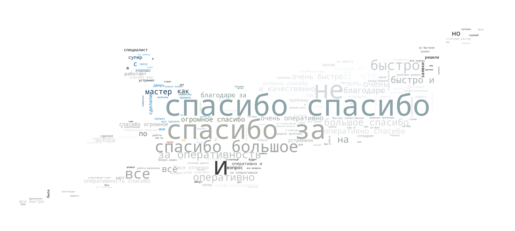

In [18]:
from PIL import Image
import numpy as np

plain = np.array(Image.open('/content/drive/MyDrive/nlp/самолет.png'))

plain_world_cloud = WordCloud(mask = plain, background_color='white',
                              width=2048, height=1048).generate(text)

background_plain = ImageColorGenerator(plain)
plain_world_cloud.recolor(color_func=background_plain)
plain_world_cloud.to_file('/content/drive/MyDrive/nlp/самолетик.png')

plt.imshow(plain_world_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**2. Корреляция между категориями**

 например, часто ли встречаются вместе «Вопрос решен» и «Нравится скорость отработки заявок».

**3. Длина комментариев**


Среднюю и медианную длину комментариев (в словах или символах).

Построить гистограмму распределения длины.

Опционально: сравнить длину по категориям.

**4. Среднее количество категорий на комментарий**

Посчитать, сколько меток (True) ставится на один комментарий в среднем.

Построить гистограмму распределения меток по комментам.

# Модель и настройка весов

In [19]:
# https://habr.com/ru/articles/704592/


In [20]:
!pip install transformers
!pip install datasets
!pip install torch
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import Dataset, DatasetDict
import pandas as pd
import evaluate
import numpy as np
from sklearn.model_selection import train_test_split
import torch


In [ ]:
dataset_pandas = model_df

labels = model_df.columns[3:].to_list()

train, test = train_test_split(dataset_pandas, test_size=0.2, random_state=42)

train_data = Dataset.from_pandas(train)
test_data = Dataset.from_pandas(test)

dataset = DatasetDict({
    'train': train_data,
    'test': test_data
    }
)

tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-multilingual-uncased')

tokenized = tokenizer(dataset['train']['comment'][0:1], padding='max_length', truncation=True)

In [ ]:
ex = dataset['train']['comment'][0:1]
ex

['ответа на вопрос нет']

In [ ]:
def tokenize(examples):
    print("=== examples ===")
    print("Тексты:", examples['comment'][:2])  # Первые 2 текста
    print("Метки:", [examples[label][:2] for label in labels])  # Первые 2 метки

    tokenized = tokenizer(examples['comment'], padding='max_length', truncation=True)
    tokenized['labels'] = examples[labels]
    return tokenized

tokenize(dataset['train'])

=== examples ===
Тексты: ['ответа на вопрос нет', 'этот же автомобиль в этом же месте припаркован на данный момент. из-за этого автомобиля участок еле проходим']
Метки: [[0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0]]


ValueError: invalid literal for int() with base 10: 'Понравилось выполнение заявки'

In [ ]:
def tokens():
  ex = dataset['train']['comment'][0:1]
  tok = tokenizer(ex, padding='max_length', truncation=True)
  tok['labels'] = dataset[:ex][labels]

tokens()

KeyError: "Invalid key: slice(None, ['ответа на вопрос нет'], None). Please first select a split. For example: `my_dataset_dictionary['train'][slice(None, ['ответа на вопрос нет'], None)]`. Available splits: ['test', 'train']"

In [ ]:
tokenized

{'input_ids': [[101, 73721, 10185, 10124, 51582, 29193, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:

dataset_pandas = model_df

labels = model_df.columns[3:].to_list()

train, test = train_test_split(dataset_pandas, test_size=0.2, random_state=42)

train_data = Dataset.from_pandas(train)
test_data = Dataset.from_pandas(test)

dataset = DatasetDict({
    'train': train_data,
    'test': test_data
    }
)

tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-multilingual-uncased')

model = AutoModelForSequenceClassification.from_pretrained('google-bert/bert-base-multilingual-uncased', num_labels=len(labels), problem_type="multi_label_classification")

def tokenize(examples):
    tokenized = tokenizer(examples['comment'], padding='max_length', truncation=True)
    tokenized['labels'] = examples[labels]
    return tokenized

mapped_dataset = dataset.map(tokenize, batched=True)

metric = evaluate.load('roc_auc', 'multilabel')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1898 [00:00<?, ? examples/s]

TypeError: unhashable type: 'list'

In [ ]:


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probabilities =  torch.sigmoid(torch.from_numpy(logits)).numpy()
    predictions = (probabilities > 0.5).astype(int)

    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
        output_dir='/content/drive/MyDrive/nlp/',
        eval_strategy='epoch',
        save_strategy='epoch',
        learning_rate=2e-5,
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        num_train_epochs=4,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model='roc_auc',
        report_to="none"



)

data_colator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=mapped_dataset['train'],
    eval_dataset = mapped_dataset['test'],
    compute_metrics=compute_metrics,
    processing_class=tokenizer,
    data_collator=data_colator

)

trainer.train()

ValueError: The model did not return a loss from the inputs, only the following keys: logits. For reference, the inputs it received are input_ids,token_type_ids,attention_mask.